# Import Relevant Libraries

In [1]:
# DATA MANIPULATION
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None) # Show all columns of a Pandas DataFrame

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample distribution against a Normal distribution,
# to check whether your sample is normally distributed or not

# PIPELINE AND COLUMNTRANSFORMER
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn import set_config; set_config(display="diagram")


# TRAIN/TEST SPLIT
from sklearn.model_selection import train_test_split

# SCALERS
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# ENCODER
from sklearn.preprocessing import OneHotEncoder

# LINEAR MODELS
from sklearn.linear_model import Ridge, ElasticNet

# TREES AND ENSEMBLE METHODS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# METRICS
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

#GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import Data

The data used for this project can be found in __[Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)__


In [2]:
df = pd.read_csv("../data/data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

### Drop Columns

In [3]:
# Drop irrelevant columns
df.drop(columns = ['car_ID', 'CarName'], inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df["price"].mean()

13276.710570731706

### Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

This shows no missing values

### Column Transformation

We will transfor the `cylindernumber` column into numerical

In [7]:
df["cylindernumber"] = df["cylindernumber"].map({"four":4,
                                                 "six":6,
                                                 "five":5,
                                                 "eight":8,
                                                 "two":2,
                                                 "twelve":12,
                                                 "three":3})

### Duplicates

In [8]:
print(f"Number of duplicated rows = {df.duplicated().sum()}")

Number of duplicated rows = 1


In [9]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
24,1,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
120,1,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0


In [10]:
df = df.drop_duplicates()

In [11]:
print(f"Number of duplicated rows = {df.duplicated().sum()}")

Number of duplicated rows = 0


###  Distribution

In [12]:
# Select numerical features

df_num = df.select_dtypes(exclude = ['object'])
df_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
# Checking Skewness

skewness = df_num.skew()

# Create a new DataFrame with the skewness values
skewness_df = pd.DataFrame(skewness)

# Rename the column '0' to 'skewness'
skewness_df = skewness_df.rename(columns={0: 'skewness'})

skewness_df.sort_values(by='skewness', ascending=False)

,skewness
cylindernumber,2.808255
compressionratio,2.602516
enginesize,1.944603
price,1.773964
horsepower,1.400842
wheelbase,1.043647
carwidth,0.898427
curbweight,0.676628
citympg,0.675634
highwaympg,0.552969


Skewness measures the asymmetry of the probability distribution of a variable. 

- If skewness is **close to 0**, the distribution is approximately **symmetrical**.
- If skewness is **greater than 0**, the distribution is **right-skewed** (positively skewed), which means it has a long tail on the right side.
- If skewness is **less than 0**, the distribution is **left-skewed** (negatively skewed), which means it has a long tail on the left side.

Based on the results we have the following:

- `symboling`, `carlength`, `carwidth`, `carheight`, `curbweight`, `boreratio`, `peakrpm`, `citympg`, and `highwaympg` are relatively close to 0, indicating approximately **symmetrical** distributions.
- `wheelbase`, `enginesize`, `horsepower`, and `price` are positively skewed, meaning they have longer tails on the **right** side.
- `stroke` is negatively skewed, indicating a longer tail on the **left** side.
- `cylindernumber` and `compressionratio` are significantly positively skewed.

Now we will visualize the Distribution, Outliers and Gaussianity of the numerical features


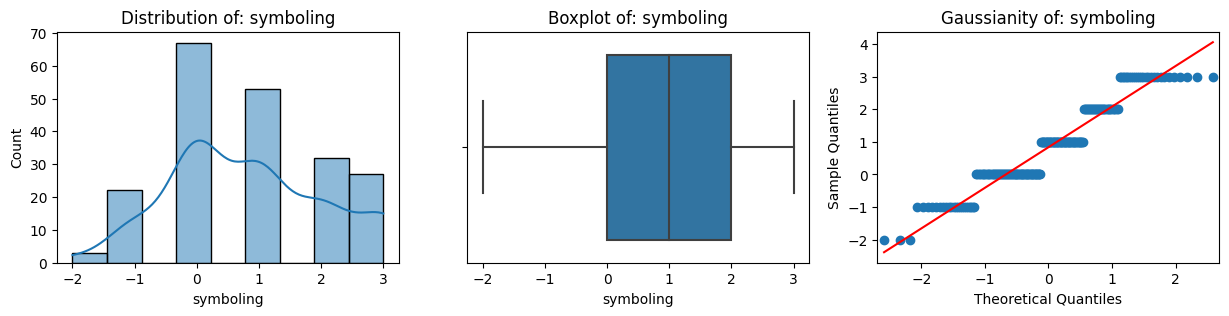

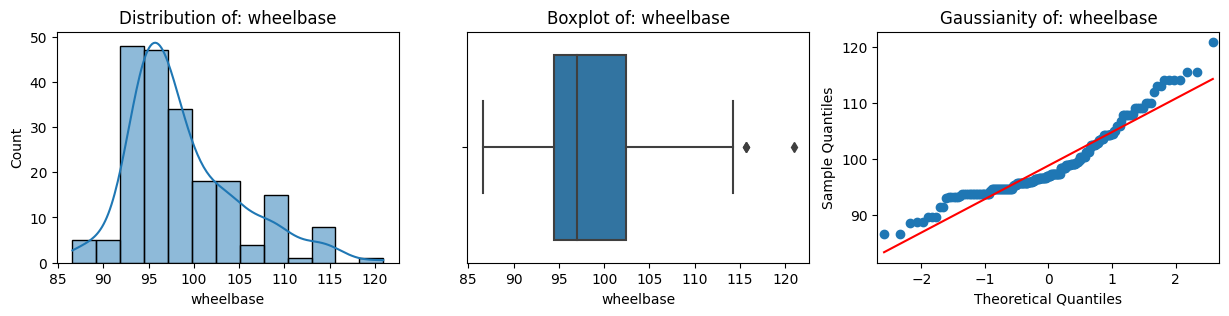

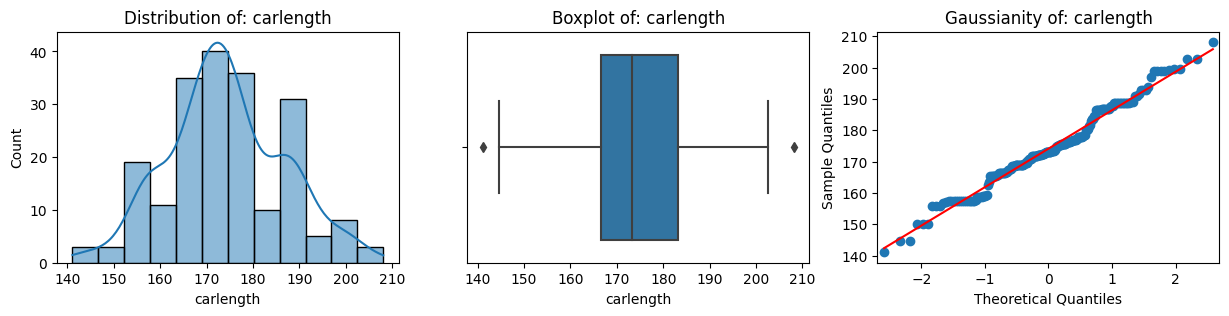

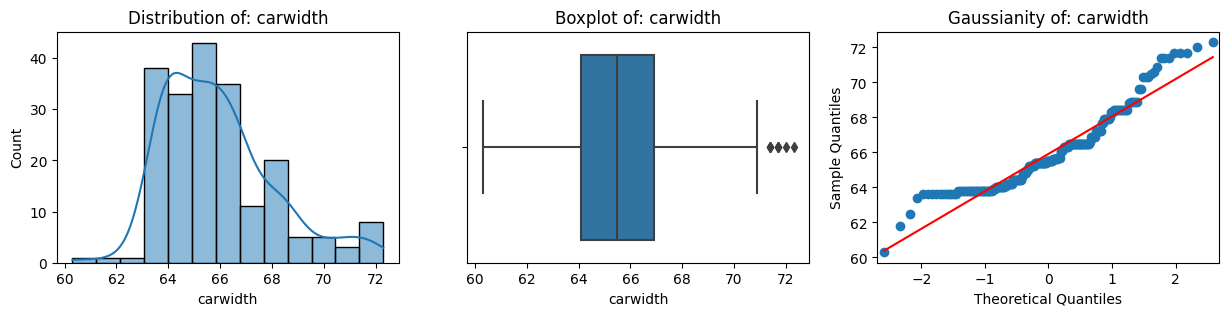

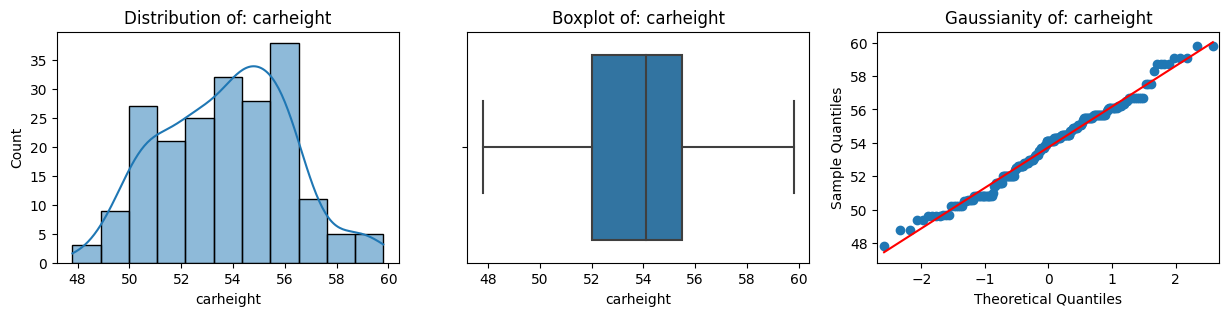

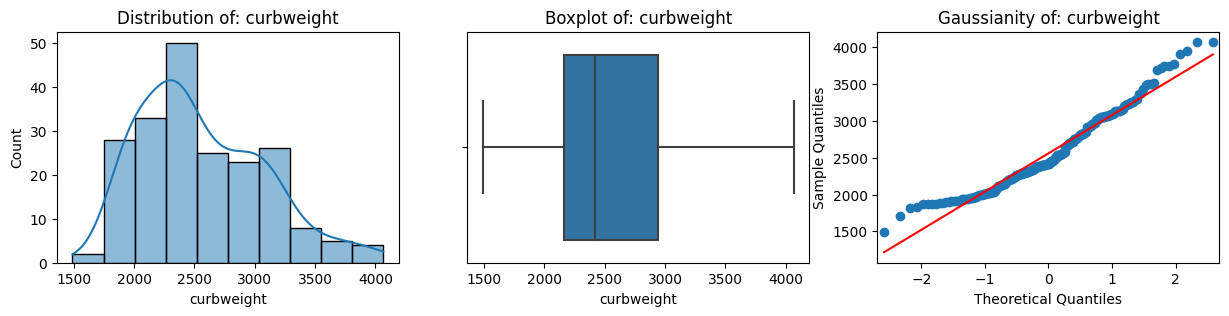

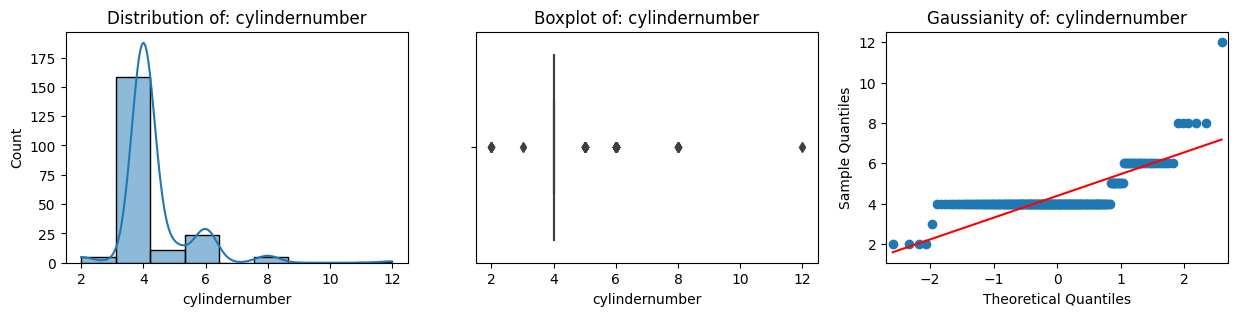

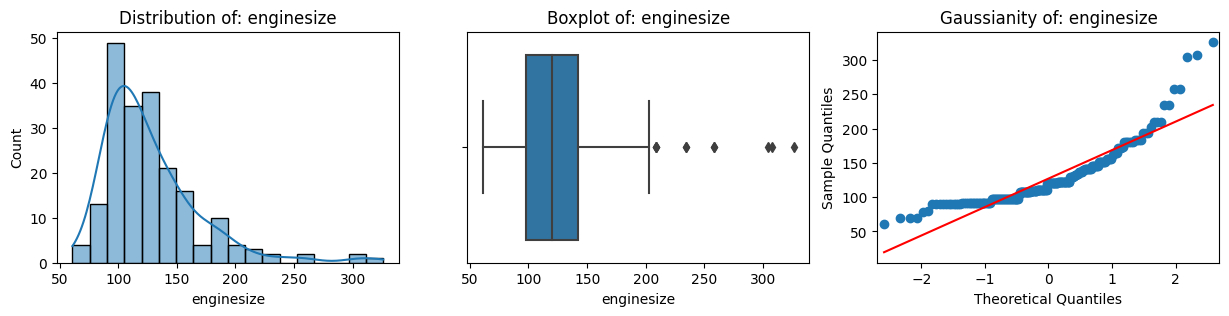

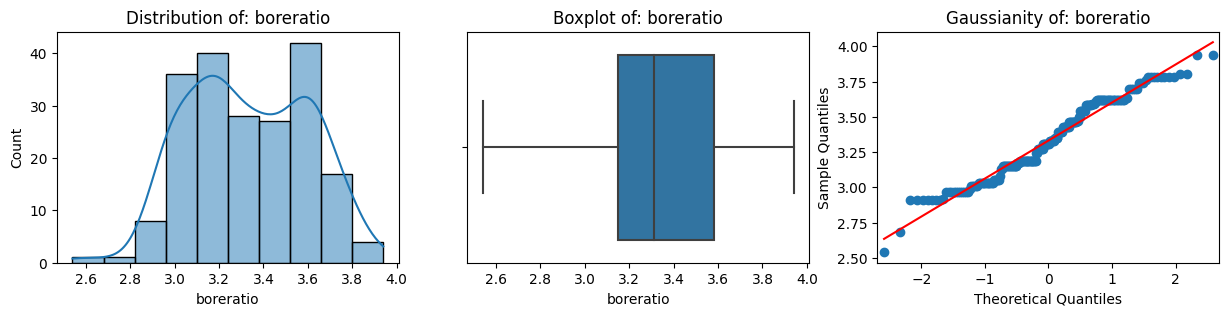

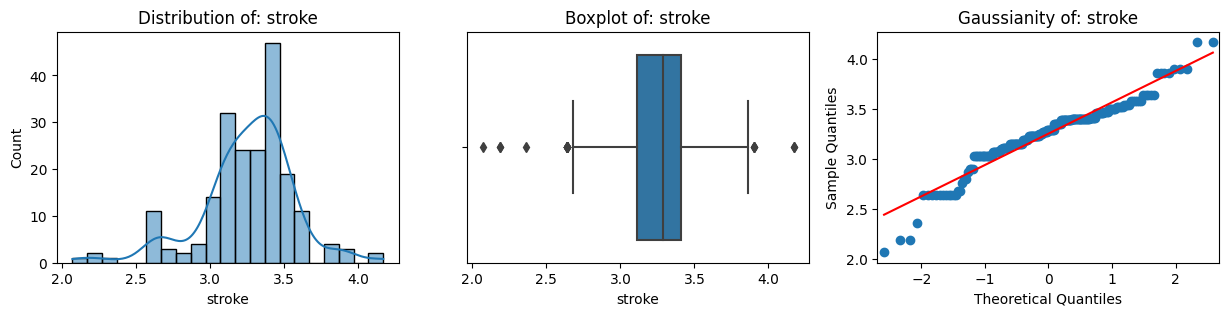

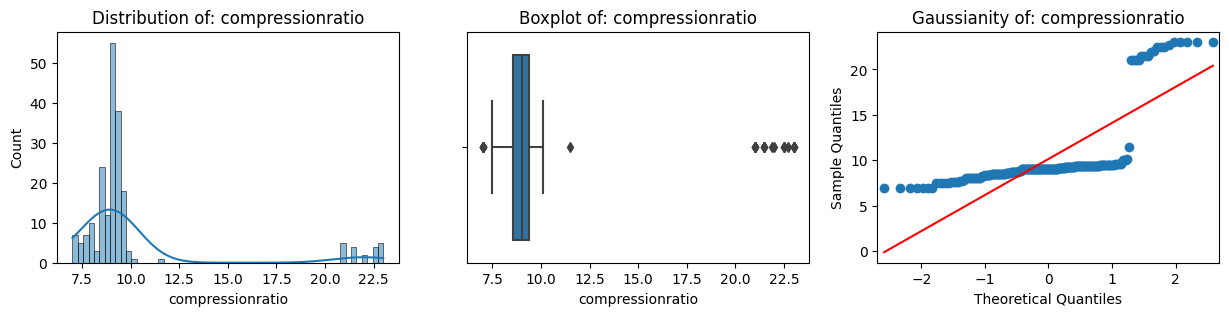

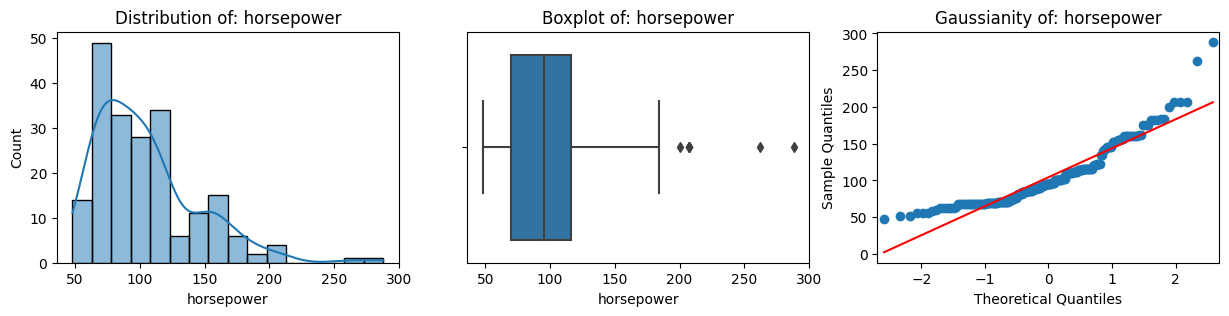

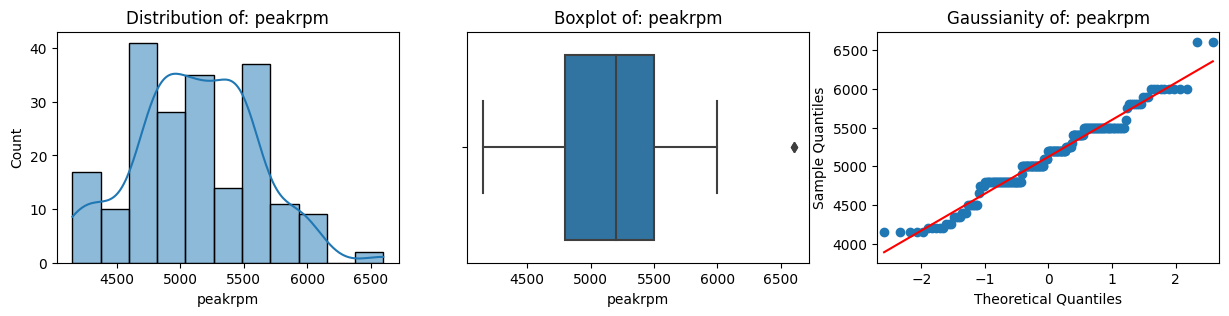

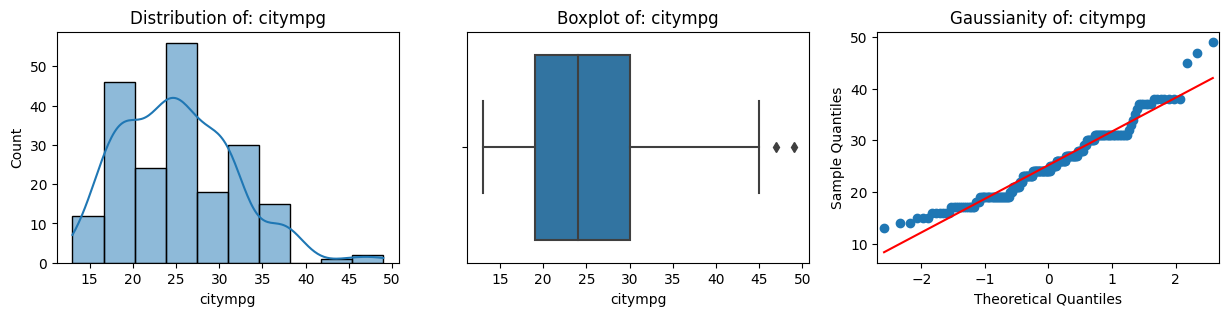

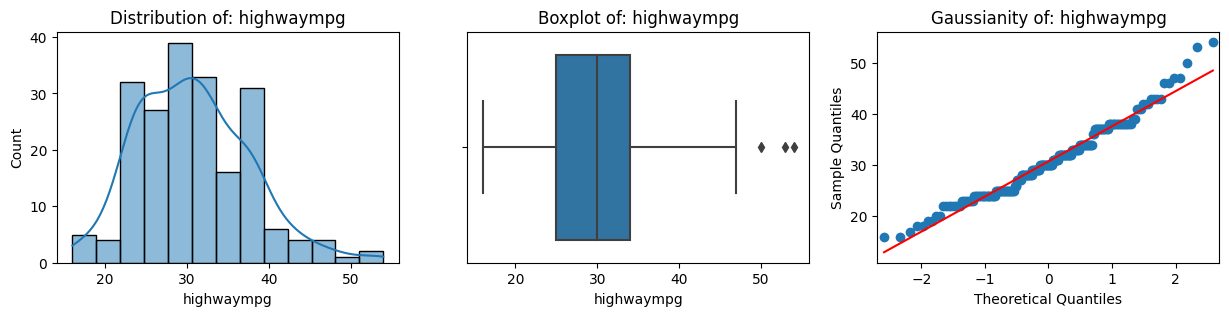

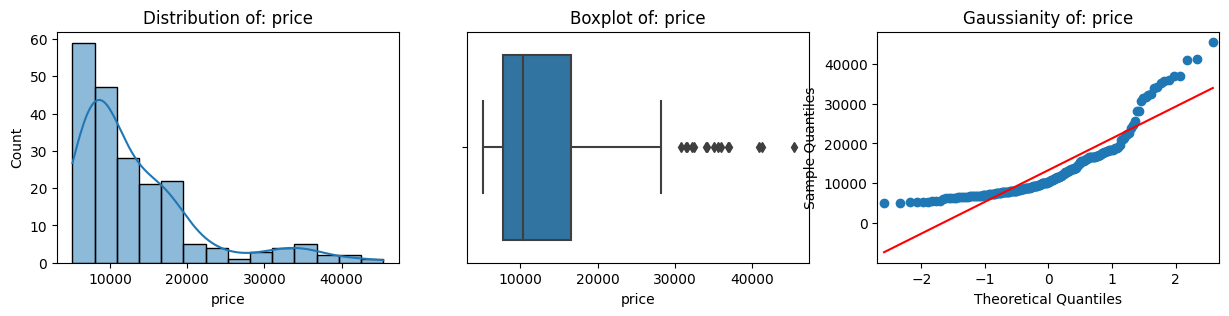

In [14]:
# Visualization

for numerical_feature in df_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df_num, x = numerical_feature, kde=True, ax = ax[0])
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = df_num, x = numerical_feature, ax=ax[1])
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num[numerical_feature],line='s',ax=ax[2]);


Based on the Distributions we will select different scalers for our features preprocessing.


***StandardScaler:***

- StandardScaler scales features by subtracting the mean and dividing by the standard deviation.
- It assumes that the data is *normally distributed* (or at least approximately normally distributed) and it is *sensitive to outliers*
- *Facit:*  when data is normally distributed or when you want to transform the data to have a mean of 0 and a standard deviation of 1.

***RobustScaler:***

- RobustScaler scales features using statistics that are robust to outliers, making it suitable for data with many outliers or a heavy-tailed distribution.
- It uses the median and the interquartile range (IQR) for scaling, rather than the mean and standard deviation used in StandardScaler.
- *Facit:* when data contains significant outliers, and you want to prevent them from heavily influencing the scaling process.

***MinMaxScaler:***

- MinMaxScaler scales features to a specified range, typically between 0 and 1.
- It works well when the data needs to be scaled to a specific range, and there are no significant outliers.
- Good if we do not have a Gaussian Distribution in the feature
- It neither reduces the effect of outliers nor changes skewness.
- *Facit:* when you want to preserve the relative relationships between the data points and map them to a specific range.

In [15]:
df_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [16]:
# Suggestion for scaling

features_robust = ["wheelbase", "cylindernumber", "enginesize", "stroke", "compressionratio", "horsepower", "citympg"]

features_standard = ["symboling", "carlength", "carwidth", "carheight",\
                          "curbweight", "boreratio", "highwaympg"]

features_minmax = ["peakrpm"]

## Preprocessing 

In [17]:
# Define features and target

X = df.drop(columns = ["price"])
y = df["price"]

In [18]:
# X.columns = X.columns.astype(str)
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 204, dtype: float64

### Numerical Pipeline

In [19]:
# Select num features as in distribution chapter

X_num = X.select_dtypes(exclude = ['object'])
X_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27


In [20]:
# Column Transformer with the 3 Scaler

scalers = ColumnTransformer(
                                [
                                    ("robust_scaler", RobustScaler(), features_robust),
                                    ("standard_scaler", StandardScaler(), features_standard),
                                    ("minmax_scaler", MinMaxScaler(), features_minmax)
                                ])

In [21]:
# Pipeline (if we had NaN, we could add an Imputer)

num_transformer = make_pipeline(

                                scalers
                                            )

num_transformer

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['wheelbase',
                                                   'cylindernumber',
                                                   'enginesize', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'citympg']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['symboling', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'boreratio',
                                                   'highwaympg']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['peakrpm'])]))])

In [22]:
# Let's plot the result

X_num_scaled = pd.DataFrame(num_transformer.fit_transform(X_num))
X_num_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.063291,0.0,0.225989,-2.033333,0.000000,0.347826,-0.272727,1.739942,-0.434110,-0.849558,-2.029946,-0.020135,0.513529,-0.541044,0.346939
1,-1.063291,0.0,0.225989,-2.033333,0.000000,0.347826,-0.272727,1.739942,-0.434110,-0.849558,-2.029946,-0.020135,0.513529,-0.541044,0.346939
2,-0.316456,2.0,0.723164,0.600000,0.000000,1.282609,-0.454545,0.133842,-0.238689,-0.195382,-0.550692,0.509690,-2.416041,-0.686655,0.346939
3,0.354430,0.0,-0.248588,0.366667,1.212121,0.152174,0.000000,0.936892,0.201009,0.131706,0.230026,-0.426656,-0.524799,-0.104212,0.551020
4,0.303797,1.0,0.361582,0.366667,-1.212121,0.434783,-0.545455,0.936892,0.201009,0.225159,0.230026,0.511617,-0.524799,-1.269098,0.551020


As we lost the features names we can create a custom column transformer to keep the names

### Categorical Pipeline

In [23]:
# Select cat features 

X_cat = X.select_dtypes(include=['object'])
X_cat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,mpfi
1,gas,std,two,convertible,rwd,front,dohc,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,mpfi
3,gas,std,four,sedan,fwd,front,ohc,mpfi
4,gas,std,four,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,idi


In [24]:
# Pipeline (if we had NaN, we could add an Imputer)

cat_transformer = make_pipeline(
                    OneHotEncoder(sparse_output = False, handle_unknown = "error", drop='if_binary')
                )

cat_transformer

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='if_binary', sparse_output=False))])

In [25]:
X_cat_encoded = pd.DataFrame(cat_transformer.fit_transform(X_cat))
X_cat_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Full Pipeline

Let's now reproduce the whole pipeline

In [26]:
# Define the numerical and categorical features
num_features = X_num.columns
cat_features  = X_cat.columns
 
# Define the transformers for numerical and categorical features
num_transformer = make_pipeline(
                                scalers,
                            )

cat_transformer = make_pipeline(
                                OneHotEncoder(sparse_output=False, 
                                              handle_unknown='ignore')
                            )


# Create the preprocessor using `make_column_transformer`
preprocessor = make_column_transformer(
                                        (num_transformer, num_features),
                                        (cat_transformer, cat_features),
                                    )

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('columntransformer',
                                                  ColumnTransformer(transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['wheelbase',
                                                                                    'cylindernumber',
                                                                                    'enginesize',
                                                                                    'stroke',
                                                                                    'compressionratio',
                                                                                    'horsepower',
                                                                                    'citympg']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['symboling',
                                                                                    'carlength',
                                                                                    'carwidth',
                                                                                    'carheight',
                                                                                    'curbweight',
                                                                                    'boreratio...
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object'))])

In [27]:
# # Fitting to check result

# fully_preprocessed_dataset = pd.DataFrame(preprocessor.fit_transform(X))
# fully_preprocessed_dataset

## Modelling

### Baseline

Let's first perform a baseline model comparison

In [28]:
def df_regression_models(regression_model):
    
    piped_regressor = make_pipeline(preprocessor, regression_model)
    
    return piped_regressor


In [29]:
models_names = ["Ridge",
                "ElasticNet",
                "DecisionTreeRegressor",
                "RandomForestRegressor",
                "AdaBoostRegressor",
                "GradientBoostingRegressor",
]

In [30]:
%%time


random_seed = 42

models = [
    Ridge(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000),  # Increase max_iter
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
]

# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


# Lists to store the test scores and MSE for each model
different_test_scores = []
different_mse_scores = []

for model_name, model in zip(models_names, models):
    # Create the model pipeline
    temp_piped_regressor = df_regression_models(model)

    # Fit the model on the training data
    temp_piped_regressor.fit(X_train, y_train)

    # Predict on the test data
    y_pred = temp_piped_regressor.predict(X_test)

    # Calculate the R-squared score
    test_score = r2_score(y_test, y_pred)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Append the test scores and MSE to the respective lists
    different_test_scores.append({'Model Name': model_name, 'R2': test_score})
    different_mse_scores.append({'Model Name': model_name, 'MSE': mse})

# Create dataframes to store the test scores and MSE
comparing_regression_models_df = pd.DataFrame(different_test_scores)
comparing_regression_models_df_mse = pd.DataFrame(different_mse_scores)

# Sort the dataframes by test_score and MSE in descending order
comparing_regression_models_df = comparing_regression_models_df.sort_values(by='R2', ascending=False)
comparing_regression_models_df_mse = comparing_regression_models_df_mse.sort_values(by='MSE', ascending=True)

# Display the results
print("R-squared scores:")
print(round(comparing_regression_models_df, 2))
print("\nMean Squared Errors:")
print(round(comparing_regression_models_df_mse, 2))


R-squared scores:
                  Model Name    R2
3      RandomForestRegressor  0.92
5  GradientBoostingRegressor  0.91
4          AdaBoostRegressor  0.91
2      DecisionTreeRegressor  0.83
0                      Ridge  0.82
1                 ElasticNet  0.73

Mean Squared Errors:
                  Model Name          MSE
3      RandomForestRegressor   6308457.84
5  GradientBoostingRegressor   7379325.45
4          AdaBoostRegressor   7529427.91
2      DecisionTreeRegressor  13893367.27
0                      Ridge  14653759.07
1                 ElasticNet  21957659.62
CPU times: total: 234 ms
Wall time: 490 ms


In [31]:
# Cross Validation


# Lists to store the cross-validation scores for each model
different_test_scores_cv = []

# Perform 5-fold cross-validation for each regression model
for model_name, model in zip(models_names, models):
    # Create the model pipeline
    temp_piped_regressor = df_regression_models(model)
    
    # Calculate cross-validation scores using the entire dataset (X, y)
    scores = cross_val_score(temp_piped_regressor, X, y, cv=5, scoring='r2')

    
    # Calculate the mean of cross-validation scores for the current model
    mean_cv_score = scores.mean()
    
    # Append the mean cross-validation score to the list
    different_test_scores_cv.append(mean_cv_score)

# Create a DataFrame to compare the models based on their cross-validation scores
comparing_regression_models_df_cv = pd.DataFrame(list(zip(models_names, different_test_scores_cv)),
                                                  columns=['Model Name', 'cross_val_R2'])

# Sort the DataFrame by cross-validation score in descending order
comparing_regression_models_df_cv = comparing_regression_models_df_cv.sort_values(by="cross_val_R2", ascending=False)

# Display the DataFrame with the results
round(comparing_regression_models_df_cv, 2)


,Model Name,cross_val_R2
1,ElasticNet,0.56
5,GradientBoostingRegressor,0.47
3,RandomForestRegressor,0.40
4,AdaBoostRegressor,0.34
2,DecisionTreeRegressor,0.33
0,Ridge,0.27


### GridSearchCV

In [32]:
# GridSearchCV

# Set a random seed for reproducibility
random_seed = 42

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Define the list of regression models to be evaluated
models = [
    Ridge(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
]

# Define the hyperparameter grid for each model
param_grid = {
    
    'Ridge': {'ridge__alpha': [0.1, 1.0, 10.0]},
    
    
    'ElasticNet': {'elasticnet__alpha': [0.1, 1.0, 10.0], 
                   'elasticnet__l1_ratio': [0.2, 0.5, 0.8], 
                   'elasticnet__max_iter': [10000, 2000]},
    
    'DecisionTreeRegressor': {'decisiontreeregressor__max_depth': [None, 5, 10]},
    
    'RandomForestRegressor': {'randomforestregressor__n_estimators': [50, 100, 200], 
                              'randomforestregressor__max_depth': [None, 5, 10]},
    
    'AdaBoostRegressor': {'adaboostregressor__n_estimators': [50, 100, 200], 
                          'adaboostregressor__learning_rate': [0.01, 0.1, 1.0]},
    
    'GradientBoostingRegressor': {'gradientboostingregressor__n_estimators': [50, 100, 200], 
                                  'gradientboostingregressor__learning_rate': [0.01, 0.1, 1.0], 
                                  'gradientboostingregressor__max_depth': [3, 5, 7]}
}

# Perform grid search for each model
best_models = {}  # Dictionary to store the best models for each model type
results = []  # List to store the evaluation results for each model

for model_name, model in zip(models_names, models):
    # Create a pipeline with the preprocessor and the current model
    model_pipeline = make_pipeline(preprocessor, model)
    
    # Create a GridSearchCV object for hyperparameter tuning
    grid_search = GridSearchCV(model_pipeline, param_grid[model_name], cv=5, n_jobs=-1)
    
    # Perform grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Store the best model obtained from the grid search
    best_models[model_name] = grid_search.best_estimator_

    # Evaluate the best model on the test data
    model = best_models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append the evaluation results to the list
    results.append({'Model Name': model_name, 'R_2': test_score, 'MSE': mse})

# Convert the evaluation results list to a DataFrame
results_df = pd.DataFrame(results)


In [33]:
# Result with GridSearch

results_df.sort_values(by='R_2', ascending=False)

,Model Name,R_2,MSE
3,RandomForestRegressor,0.921964,6.364332e+06
5,GradientBoostingRegressor,0.907063,7.579609e+06
4,AdaBoostRegressor,0.901405,8.041015e+06
2,DecisionTreeRegressor,0.830027,1.386239e+07
0,Ridge,0.820323,1.465376e+07
1,ElasticNet,0.799000,1.639280e+07


In [34]:
# Result with Baseline

comparing_regression_models_df

,Model Name,R2
3,RandomForestRegressor,0.922649
5,GradientBoostingRegressor,0.909519
4,AdaBoostRegressor,0.907678
2,DecisionTreeRegressor,0.829647
0,Ridge,0.820323
1,ElasticNet,0.730767
